#### D Siva Manoj MDS202216  Assignment 2

## Setup

In [1]:
import os

In [2]:
!git init
!dvc init --subdir

Initialized empty Git repository in C:/Users/win/Desktop/Data_Science/4th_sem/Applied_ML/assignment_02/.git/
Initialized DVC repository.

You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|             <https://dvc.org/doc/user-guide/analytics>              |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: <https://dvc.org/doc>
- Get help and share ideas: <https://dvc.org/chat>
- Star us on GitHub: <https://github.com/iterative/dvc>


In [3]:
!git status
!git commit -m "DVC initialized"

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   .dvc/.gitignore
	new file:   .dvc/config
	new file:   .dvcignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	prepare.ipynb



[master (root-commit) 6b0a29f] DVC initialized
 3 files changed, 6 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config
 create mode 100644 .dvcignore


#### Setting google drive as remote storage

In [4]:
!dvc remote add -d remote_storage gdrive://1qmHWUWrdxtVzVNPsztMlrmmRHSaVnheb -f

Setting 'remote_storage' as a default remote.


In [5]:
!git add .dvc/config
!git status
!git commit -m "Updated remote storage"

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   .dvc/config

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	prepare.ipynb

[master e1e95cf] Updated remote storage
 1 file changed, 4 insertions(+)


## Import Libraries

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import re
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split

import nltk
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download("wordnet")
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\win\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Pre-process data

In [7]:
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('re')

def preprocess_spam_data(data):
    # Convert to lowercase
    data['text'] = data['text'].str.lower()

    # Remove punctuation
    data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    ## remove numbers from the text column
    data["text"] = data["text"].apply(lambda x: re.sub(r"\d+", "", x))

    # Tokenize
    data['text'] = data['text'].apply(word_tokenize)

    # Remove stop words
    data['text'] = data['text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    data['text'] = data['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

    ## remove single character words
    data["text"] = data["text"].apply(lambda x: [word for word in x if len(word)>1])

    # Join tokens back into strings
    data['text'] = data['text'].apply(lambda x: ' '.join(x))

    return data


#### Train Test Validation Split

In [8]:
def train_val_test(data, seed):
    train_val, test = train_test_split(data, test_size = 0.12, random_state = seed)
    train, val = train_test_split(train_val, test_size = 0.09, random_state = seed) 
    return train, val, test

In [9]:
## load the raw dataset
data = pd.read_csv(r"C:\Users\win\Desktop\Data_Science\4th_sem\Applied_ML\spam_detection\emails.csv")
## clean and preprocess the data
raw_data = preprocess_spam_data(data)
## split data into train, validation and test datasets with specific random seed
train, val, test = train_val_test(raw_data, 1)

#### Save the data

In [10]:
## save the pre-processed raw data in the raw folder
raw_data.to_csv("raw_data.csv", header = True, index = False)

## save the split data in the prepared folder
train.to_csv("train.csv", header = True, index = False)
val.to_csv("validation.csv", header = True, index = False)
test.to_csv("test.csv", header = True, index = False)

## Track data versions with dvc

### For raw data

In [11]:
!dvc add raw_data.csv


To track the changes with git, run:

	git add .gitignore raw_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [12]:
!git status
!git add raw_data.csv.dvc .gitignore
!git commit -m "updates raw data"

On branch master
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.gitignore
	prepare.ipynb
	raw_data.csv.dvc
	test.csv
	train.csv
	validation.csv

nothing added to commit but untracked files present (use "git add" to track)


[master 28b4684] updates raw data
 2 files changed, 6 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 raw_data.csv.dvc


### For split data

In [13]:
!dvc add train.csv validation.csv test.csv


To track the changes with git, run:

	git add test.csv.dvc train.csv.dvc validation.csv.dvc .gitignore

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [14]:
!git status
!git add train.csv.dvc validation.csv.dvc test.csv.dvc .gitignore
!git commit -m "initialize data versioning with dvc"

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .gitignore

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	prepare.ipynb
	test.csv.dvc
	train.csv.dvc
	validation.csv.dvc

no changes added to commit (use "git add" and/or "git commit -a")
[master e439e93] initialize data versioning with dvc
 4 files changed, 18 insertions(+)
 create mode 100644 test.csv.dvc
 create mode 100644 train.csv.dvc
 create mode 100644 validation.csv.dvc


In [15]:
!dvc push

4 files pushed


### Data versions with different random seed

In [16]:
train, val, test = train_val_test(raw_data, 2)

In [17]:
## save the data
train.to_csv("train.csv", header = True, index = False)
val.to_csv("validation.csv", header = True, index = False)
test.to_csv("test.csv", header = True, index = False)

In [18]:
## add updated data splits to DVC
!dvc add train.csv validation.csv test.csv


To track the changes with git, run:

	git add test.csv.dvc validation.csv.dvc train.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


⠋ Checking graph



In [19]:
!git status
!git add train.csv.dvc validation.csv.dvc test.csv.dvc .gitignore
!git commit -m "updated data splits with new random seed"

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   test.csv.dvc
	modified:   train.csv.dvc
	modified:   validation.csv.dvc

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	prepare.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


[master 505b90c] updated data splits with new random seed
 3 files changed, 6 insertions(+), 6 deletions(-)


In [20]:
## push the new data split version to remote storage
!dvc push

3 files pushed


## Chechout the versions

#### First split

In [21]:
!git log

commit 505b90c32c7ea95882aa358e38f49380cd060e02
Author: sivamanojcmi <sivamanoj@cmi.ac.in>
Date:   Wed Feb 21 22:46:04 2024 +0530

    updated data splits with new random seed

commit e439e93c2952b561badb40c56076562c61d416d7
Author: sivamanojcmi <sivamanoj@cmi.ac.in>
Date:   Wed Feb 21 22:45:05 2024 +0530

    initialize data versioning with dvc

commit 28b46843fc3ee13d41adfef59157dee0dce629fb
Author: sivamanojcmi <sivamanoj@cmi.ac.in>
Date:   Wed Feb 21 22:44:29 2024 +0530

    updates raw data

commit e1e95cf4ae5c3b11ade9046903ccc133351c1594
Author: sivamanojcmi <sivamanoj@cmi.ac.in>
Date:   Wed Feb 21 22:41:55 2024 +0530

    Updated remote storage

commit 6b0a29f69631e4e03b775bdf3c1625a17b02f9da
Author: sivamanojcmi <sivamanoj@cmi.ac.in>
Date:   Wed Feb 21 22:40:28 2024 +0530

    DVC initialized


In [28]:
!git checkout e439e93c2952b561badb40c56076562c61d416d7 train.csv.dvc validation.csv.dvc test.csv.dvc

Updated 3 paths from 363319e


In [29]:
!dvc checkout

M       test.csv
M       train.csv
M       validation.csv


In [30]:
train_v1 = pd.read_csv("train.csv")
val_v1 = pd.read_csv("validation.csv")
test_v1 = pd.read_csv("test.csv")

In [31]:
def show_distributions(train, val, test):
    print("Train distribution:")
    print("Number of 0s: {}".format(train["spam"].value_counts()[0]))
    print("Number of 1s: {}".format(train["spam"].value_counts()[1]))
    print("-"*32)
    print("Validation distribution:")
    print("Number of 0s: {}".format(val["spam"].value_counts()[0]))
    print("Number of 1s: {}".format(val["spam"].value_counts()[1]))
    print("-"*32)
    print("Test distribution:")
    print("Number of 0s: {}".format(test["spam"].value_counts()[0]))
    print("Number of 1s: {}".format(test["spam"].value_counts()[1]))
    print("-"*32)
    
    categories1 = train['spam'].value_counts()
    categories2 = val['spam'].value_counts()
    categories3 = test['spam'].value_counts()

    # Create subplots with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plotting pie chart for dataset 1
    axes[0].pie(categories1, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[0].set_title('Train ')

    # Plotting pie chart for dataset 2
    axes[1].pie(categories2, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[1].set_title('Validation')

    # Plotting pie chart for dataset 3
    axes[2].pie(categories3, labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    axes[2].set_title('Test')

    # Show the legend on the right side for each subplot
    axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

    return None

In [32]:
!git checkout 505b90c32c7ea95882aa358e38f49380cd060e02 train.csv.dvc validation.csv.dvc test.csv.dvc


Updated 3 paths from fc29c34


In [33]:
!dvc checkout


M       test.csv
M       validation.csv
M       train.csv


In [34]:
train_v2 = pd.read_csv("train.csv")
val_v2 = pd.read_csv("validation.csv")
test_v2 = pd.read_csv("test.csv")

#### 1) Data Label Distribution with random seed as 1

Train distribution:
Number of 0s: 3489
Number of 1s: 1097
--------------------------------
Validation distribution:
Number of 0s: 356
Number of 1s: 98
--------------------------------
Test distribution:
Number of 0s: 515
Number of 1s: 173
--------------------------------


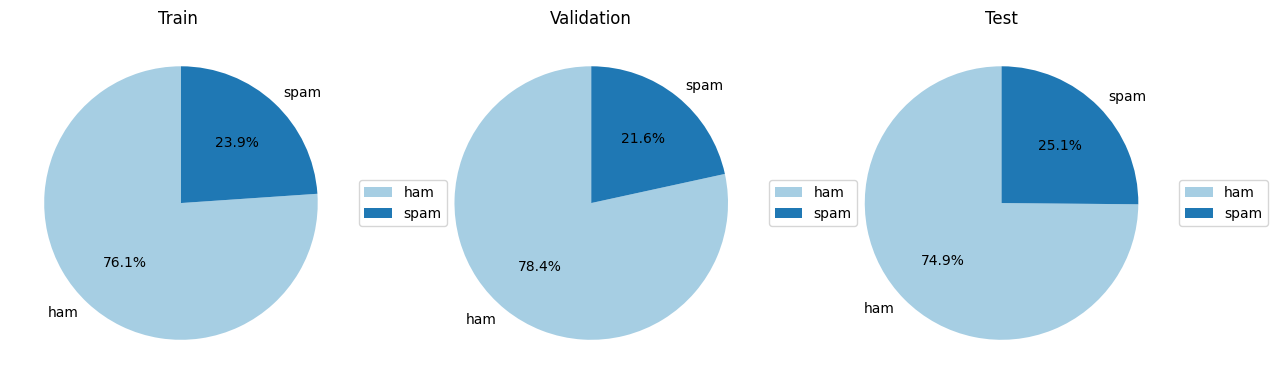

In [35]:
show_distributions(train_v1, val_v1, test_v1)

#### 2) Data Label Distribution with random seed as 2

Train distribution:
Number of 0s: 3504
Number of 1s: 1082
--------------------------------
Validation distribution:
Number of 0s: 341
Number of 1s: 113
--------------------------------
Test distribution:
Number of 0s: 515
Number of 1s: 173
--------------------------------


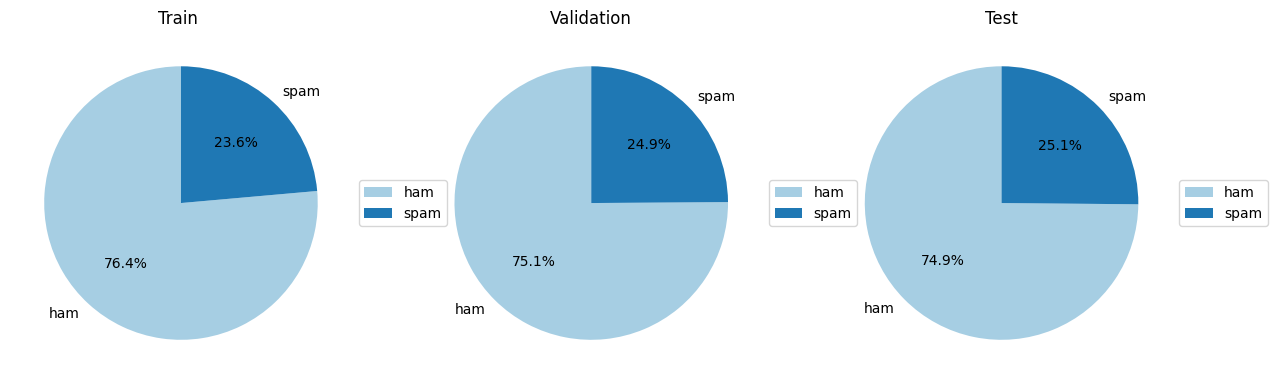

In [36]:
show_distributions(train_v2, val_v2, test_v2)
